In [23]:
def apply_pub_style(ax, remove_spines=True):
    ax.minorticks_on()
    ax.tick_params(direction='in', which='both', labelsize=11, top=False, right=False)
    if remove_spines:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    else:
        ax.spines['top'].set_linewidth(1.0)
        ax.spines['right'].set_linewidth(1.0)

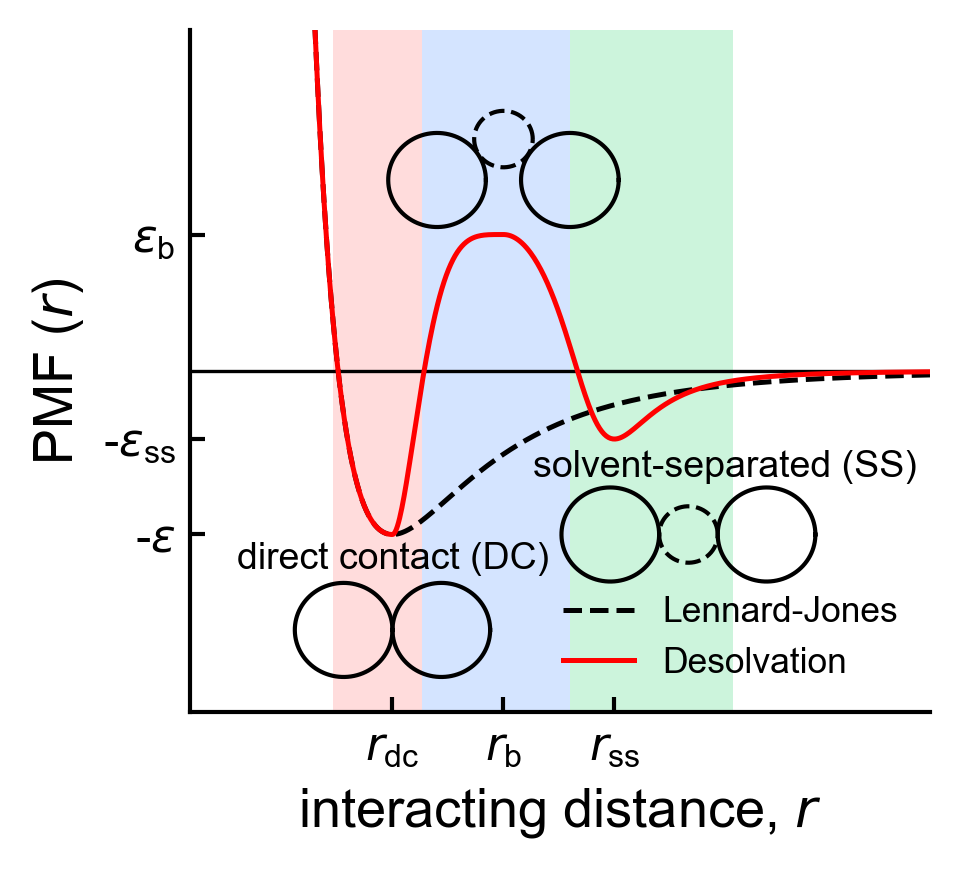

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def z(r,rcm):
    return (rcm/r)**6

def y(r,rdb):
    return (r-rdb)**2

def chan(r,e,essm,edb):
    sigma=0.6; rcm=2**(1./6)*sigma; rssm=rcm+0.3; rdb=rcm+0.15
    n=2; m=3
    c=4*n*(e+edb)/(rdb-rcm)**(4*n)
    b=m*essm*(rssm-rdb)**(2*(m-1))
    h1=(1-1/m)*(rssm-rdb)**2/(essm/edb+1)
    h2=(m-1)*(rssm-rdb)**(2*m)/(1+edb/essm)      
    res=r.copy()
    list1=np.where(r<rcm)[0]
    list2=np.where( (r>=rcm)&(r<rdb)) [0]
    list3=np.where(r>=rdb)[0]
    res[list1]=e*z(r[list1],rcm)*(z(r[list1],rcm)-2)
    res[list2]=c*y(r[list2],rdb)**n* (y(r[list2],rdb)**n/2-(rdb-rcm)**(2*n) )/2/n+edb
    res[list3]=-b*(y(r[list3],rdb)-h1)/(y(r[list3],rdb)**m+h2)
    return res

def lj(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def hps(r,epsilon,sigma,ll):
    cutoff=2**(1./6)*sigma
    list1=np.where(r<cutoff)[0]
    list2=np.where(r>=cutoff)[0]
    res=r.copy()
    res[list1]=lj(r[list1],epsilon,sigma)+(1-ll)*epsilon
    res[list2]=ll*lj(r[list2],epsilon,sigma)
    return res

r=np.linspace(0.5,2.0,1000)
eh=0.2 #kcal/mol
edb=0.1
sigma=0.6 #nm
ll=0.6 #lambda
e=0.12
essm=0.05
rcm=2**(1./6.)*sigma
rdb=rcm+0.15
rssm=rcm+0.30

x_ticks = [rcm, rdb, rssm]
x_values = [r'$r_{\mathregular{dc}}$', r'$r_{\mathregular{b}}$', r'$r_{\mathregular{ss}}$']
y_ticks = [edb, -essm, -e]
y_values = [r'$\varepsilon_{\mathregular{b}}$', r'-$\varepsilon_{\mathregular{ss}}$', r'-$\varepsilon$']

fig,ax=plt.subplots(1,1,figsize=[3.3,3.],facecolor='w',dpi=300,sharex=True,sharey=True)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8

ax.axhline(y=0, color='k', linewidth=0.8)
ax.plot(r,lj(r,e,sigma),'--',color='k',linewidth=1.2, label='Lennard-Jones')
ax.plot(r,chan(r,e,essm,edb),'-',color='r',linewidth=1.2, label='Desolvation')

rx = 0.044*3/2
ry = 0.023*3/2
rwx = rx*0.6
rwy = ry*0.6
theta = np.linspace(0, 2 * np.pi, 200)

## native contact
nc_1x = rcm+rx*np.cos(theta)-rx
nc_1y = ry*np.sin(theta)-e-0.07
nc_2x = rcm+rx*np.cos(theta)+rx
nc_2y = ry*np.sin(theta)-e-0.07
ax.plot(nc_1x, nc_1y, color='k', linewidth=1)
ax.plot(nc_2x, nc_2y, color='k', linewidth=1)

## pseudo contact
pc_1x = rssm+rx*np.cos(theta)-rx-rwx+0.1
pc_1y = ry*np.sin(theta)-e
pc_2x = rssm+rx*np.cos(theta)+rx+rwx+0.1
pc_2y = ry*np.sin(theta)-e
pc_3x = rssm+rwx*np.cos(theta)+0.1
pc_3y = rwy*np.sin(theta)-e
ax.plot(pc_1x, pc_1y, color='k', linewidth=1)
ax.plot(pc_2x, pc_2y, color='k', linewidth=1)
ax.plot(pc_3x, pc_3y, color='k', ls='--', linewidth=1)

## middle state
ms_1x = rdb+rx*np.cos(theta)-rx-rwx*0.6
ms_1y = ry*np.sin(theta)+edb+0.04
ms_2x = rdb+rx*np.cos(theta)+rx+rwx*0.6
ms_2y = ry*np.sin(theta)+edb+0.04
ms_3x = rdb+rwx*np.cos(theta)
ms_3y = rwy*np.sin(theta)+edb+0.07
ax.plot(ms_1x, ms_1y, color='k', linewidth=1)
ax.plot(ms_2x, ms_2y, color='k', linewidth=1)
ax.plot(ms_3x, ms_3y, color='k', ls='--', linewidth=1)

ax.text(rcm-0.21, -e-0.025, 'direct contact (DC)', fontsize=9.)
ax.text(rssm-0.11, -essm-0.028, 'solvent-separated (SS)', fontsize=9.)

ax.axvspan(rcm-0.08, rcm+0.04, color='#FF5252', alpha=0.2, lw=0)
ax.axvspan(rcm+0.04, rssm-0.06, color='#2979FF', alpha=0.2, lw=0)
ax.axvspan(rssm-0.06, rssm+0.16, color='#00C853', alpha=0.2, lw=0)
ax.tick_params(direction='in', which='both', labelsize=11, top=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(x_ticks, x_values)
plt.yticks(y_ticks, y_values)
plt.xlim([0.4,1.4])
plt.ylim([-0.25,0.25])
plt.legend(fontsize=8.5, frameon=False)
plt.xlabel(r'interacting distance, $r$', fontsize=13)
plt.ylabel(r'PMF ($r$)', fontsize=13)
plt.tight_layout()
plt.savefig(f"../../figures/water-pmf/desolvation.svg", format="svg", bbox_inches='tight')
plt.show()

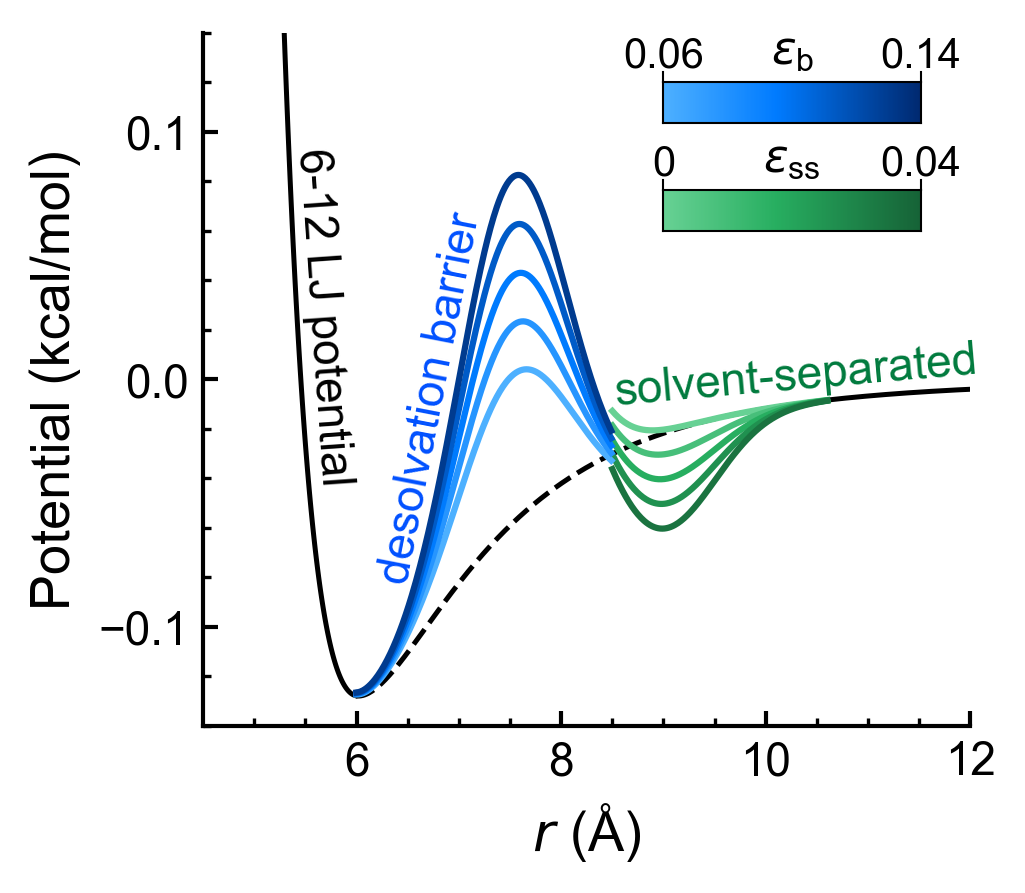

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap, Normalize

def lj(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def hps(r,epsilon,sigma,ll):
    cutoff=2**(1./6)*sigma
    list1=np.where(r<cutoff)[0]
    list2=np.where(r>=cutoff)[0]
    res=r.copy()
    res[list1]=lj(r[list1],epsilon,sigma)+(1-ll)*epsilon
    res[list2]=ll*lj(r[list2],epsilon,sigma)
    return res

def hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w):
	lj_potential = 4 * e_h * ((sigma / r)**12 - (sigma / r)**6)
	lj_potential_diff = 24 * e_h / r * (2 * (sigma / r)**12 - (sigma / r)**6)
	if r <= 2**(1.0 / 6.0) * sigma:
		V = lj_potential + (1 - lam) * e_h\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	else:
		V = lam * lj_potential\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lam * lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	return V

lam = 0.640
sigma = 0.536
r_m = 2**(1. / 6.) * sigma
r_b = r_m + 0.15
r_w = r_m + 0.30
var_b, var_w = 0.005, 0.005

fig, ax = plt.subplots(1, 1, figsize=[3.3, 3], facecolor='w', dpi=300)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
apply_pub_style(ax)

R1 = np.arange(0.5, 0.6, 0.001)
plt.plot(R1*10, hps(R1, 0.2, sigma, lam), color='k', ls='-', lw=1.2)
R2 = np.arange(0.6, 1.06, 0.001)
plt.plot(R2*10, hps(R2, 0.2, sigma, lam), color='k', ls='--', lw=1.2)
R3 = np.arange(1.06, 2, 0.001)
plt.plot(R3*10, hps(R3, 0.2, sigma, lam), color='k', ls='-', lw=1.2)

## Fix e_b
cmap_green = LinearSegmentedColormap.from_list("vibrant_green", ["#82E0AA", "#27AE60", "#145A32"], N=256)
ew_list = np.arange(0.00, 0.05, 0.01)
clist_green = cmap_green(np.linspace(0.15, 0.85, len(ew_list)))
e_b = 0.12
e_h = 0.20

R_w = np.arange(0.85, 1.06, 0.001)
for i, e_w in enumerate(ew_list):
    V = []
    for r in R_w:
        V.append(hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w))
    plt.plot(R_w*10, V, color=clist_green[i], lw=1.5, alpha=1)

## Fix e_w
cmap_blue = LinearSegmentedColormap.from_list("vibrant_blue", ["#6EC6FF", "#007BFF", "#002060"], N=256)
eb_list = np.arange(0.06, 0.16, 0.02)
clist_blue = cmap_blue(np.linspace(0.15, 0.85, len(eb_list)))
e_h = 0.20
e_w = 0.02

R_b = np.arange(0.6, 0.85, 0.001)
for i, e_b in enumerate(eb_list):
    V = []
    for r in R_b:
        V.append(hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w))
    plt.plot(R_b*10, V, color=clist_blue[i], lw=1.5, alpha=1)

plt.xlim(4.5, 12.)
plt.ylim(-0.14, 0.14)
plt.xlabel(r'$r$ ($\mathregular{\AA}$)', fontsize=13)
plt.ylabel('Potential (kcal/mol)', fontsize=13)
plt.yticks([-0.1, 0, 0.1])

plt.text(5.35, -0.04, '6-12 LJ potential', rotation=-86, fontsize=11)
plt.text(6.16, -0.08, 'desolvation barrier', rotation=79, fontsize=11, color='#0050FF')
plt.text(8.5, -0.01, 'solvent-separated', rotation=5, fontsize=11, color='#007A3D')

cbar_ax = fig.add_axes([0.59, 0.78, 0.26, 0.045])
cmap_partial = mpl.colors.ListedColormap(cmap_blue(np.linspace(0.15, 0.95, 256)))
norm = Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap_partial, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')
tick_positions = [0, 1]
for x in tick_positions:
    cbar_ax.plot([x, x], [1, 1.25], color='black', lw=0.5, transform=cbar_ax.transAxes, clip_on=False)
cbar_ax.text(0, 1.2, '0.06', ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes)
cbar_ax.text(1, 1.2, '0.14', ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes)
cbar_ax.text(0.5, 1.25, r'$\epsilon_\mathregular{b}$', ha='center', va='bottom', fontsize=11, transform=cbar_ax.transAxes)
cbar.outline.set_visible(False)
cbar.set_ticks([])

cbar_ax = fig.add_axes([0.59, 0.66, 0.26, 0.045])
cmap_partial = mpl.colors.ListedColormap(cmap_green(np.linspace(0.15, 0.95, 256)))
norm = Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap_partial, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')
tick_positions = [0, 1]
for x in tick_positions:
    cbar_ax.plot([x, x], [1, 1.25], color='black', lw=0.5, transform=cbar_ax.transAxes, clip_on=False)
cbar_ax.text(0, 1.2, '0', ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes)
cbar_ax.text(1, 1.2, '0.04', ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes)
cbar_ax.text(0.5, 1.25, r'$\epsilon_\mathregular{ss}$', ha='center', va='bottom', fontsize=11, transform=cbar_ax.transAxes)
cbar.outline.set_visible(False)
cbar.set_ticks([])

plt.savefig(f"../../figures/water-pmf/energy.svg", format="svg", bbox_inches='tight')
plt.show()

/tmp/ipykernel_3242747/1028189582.py:70: RuntimeWarning: divide by zero encountered in log
  pmf10 = -8.314e-3*298.15*np.log(spc_g*10/9)/cal2j
/tmp/ipykernel_3242747/1028189582.py:72: RuntimeWarning: divide by zero encountered in log
  pmf09 = -8.314e-3*298.15*np.log(spc09_g*10/9)/cal2j
/tmp/ipykernel_3242747/1028189582.py:74: RuntimeWarning: divide by zero encountered in log
  pmf08 = -8.314e-3*298.15*np.log(spc08_g*10/9)/cal2j


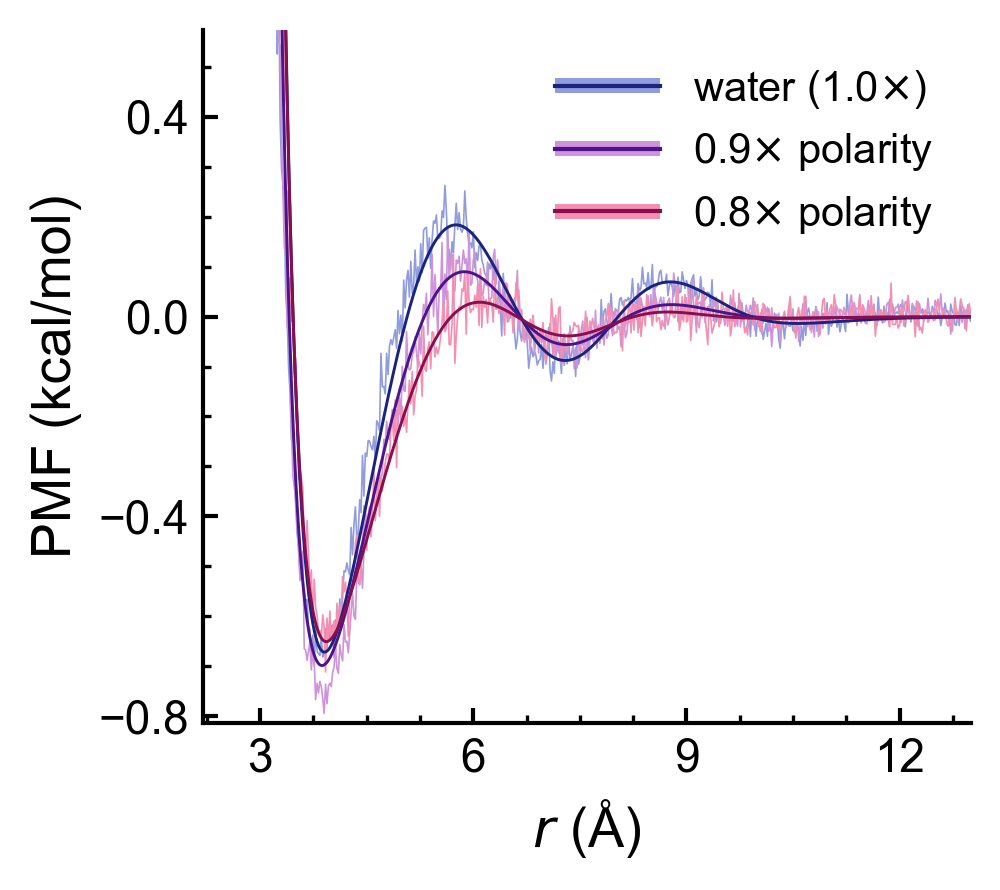

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.optimize import curve_fit

def ave_by_n(array, n=1):
    nlen = len(array)
    result = np.zeros(int(nlen / n))
    for i in range(n):
        result += array[i:(nlen - nlen%n):n]
    result /= n
    return result

def pmf_model(r, epsilon, sigma, a1, mu1, w1, a2, mu2, w2, a3, mu3, w3):
    
    r_safe = np.maximum(r, 0.1)
    
    # LJ term
    u_lj = 4 * epsilon * ((sigma / r_safe)**12 - (sigma / r_safe)**6)
    
    # Gaussian 1 (Barrier - usually positive)
    u_g1 = a1 * np.exp(-(r - mu1)**2 / (2 * w1**2))
    
    # Gaussian 2 (Solvent Separated Well - usually negative)
    u_g2 = a2 * np.exp(-(r - mu2)**2 / (2 * w2**2))

    # Gaussian 3
    u_g3 = a3 * np.exp(-(r - mu3)**2 / (2 * w3**2))
    
    return u_lj + u_g1 + u_g2 + u_g3

def des_CH4(r, sigma, eh, eb, ew, dw, hw):
	lam = 0.649
	rm = 2**(1. / 6.) * sigma
	rb, rw = rm + hw, rm + dw
	varb, varw = 0.005, 0.005
	HPS = np.piecewise(r, [r<rm, r>=rm], [lambda r: 4*eh*((sigma/r)**12-(sigma/r)**6)+(1-lam)*eh, lambda r: lam*(4*eh*((sigma/r)**12-(sigma/r)**6))])
	V = HPS + eb * np.exp(-(r-rb)**2 / varb) - ew * np.exp(-(r-rw)**2 / varw)
	return V

def fit_data(x, y):
    # Initial Guess
    # epsilon, sigma, A_barrier, mu_barrier, w_barrier, A_well2, mu_well2, w_well2
    p0 = [0.8, 3.3, 0.5, 5.5, 1.0, -0.2, 7.0, 1.0, 0.1, 9.0, 1.0]
    
    # Bounds to prevent fitting from going out of physical meaning
    # e.g., sigma > 0, width > 0
    bounds = (
        [0,   2.0,  0.0, 4.0, 0.5, -1.0, 5.0, 0.5, 0.0, 8.0, 0.5], # Lower bounds
        [2.0, 6.0,  2.0, 7.0, 2.0,  0.0, 9.0, 2.0, 0.5, 10.0, 2.0]  # Upper bounds
    )
    
    try:
        popt, _ = curve_fit(pmf_model, x, y, p0=p0, bounds=bounds, maxfev=10000)
        return popt
    except:
        return p0

clist = cm.Blues(np.arange(0.99, 0.1, -0.8/4))
cal2j = 4.184 # 1 cal = 4.184 J
spc_r = ave_by_n(np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=0))
spc_g = ave_by_n(np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=1))
spc09_r = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.9/rdf.xvg', skiprows=25, usecols=0))
spc09_g = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.9/rdf.xvg', skiprows=25, usecols=1))
spc08_r = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.8/rdf.xvg', skiprows=25, usecols=0))
spc08_g = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.8/rdf.xvg', skiprows=25, usecols=1))
r10 = spc_r*10
pmf10 = -8.314e-3*298.15*np.log(spc_g*10/9)/cal2j
r09 = spc09_r*10
pmf09 = -8.314e-3*298.15*np.log(spc09_g*10/9)/cal2j
r08 = spc08_r*10
pmf08 = -8.314e-3*298.15*np.log(spc08_g*10/9)/cal2j

fig, ax = plt.subplots(1, 1, figsize=[3.3, 3], facecolor='w', dpi=300)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
apply_pub_style(ax)

popt_10 = fit_data(r10[np.where(r10>3.5)], pmf10[np.where(r10>3.5)])
popt_09 = fit_data(r09[np.where(r09>3.5)], pmf09[np.where(r09>3.5)])
popt_08 = fit_data(r08[np.where(r08>3.5)], pmf08[np.where(r08>3.5)])

r_fit = np.linspace(3.0, 13, 1000)
y_fit_10 = pmf_model(r_fit, *popt_10)
y_fit_09 = pmf_model(r_fit, *popt_09)
y_fit_08 = pmf_model(r_fit, *popt_08)

c_bg_10, c_fg_10 = "#919CDD", "#1A237E"
c_bg_09, c_fg_09 = "#CE93D8", "#4A148C"
c_bg_08, c_fg_08 = "#F48FB1", "#880E4F"

plt.plot(r10, pmf10, color=c_bg_10, label=r'water (1.0$\times$)', linewidth=0.4, alpha=1)
plt.plot(r_fit, y_fit_10, color=c_fg_10, ls='-', linewidth=0.7, zorder=10)
plt.plot(r09, pmf09, color=c_bg_09, label=r'0.9$\times$ polarity', linewidth=0.4, alpha=1)
plt.plot(r_fit, y_fit_09, color=c_fg_09, ls='-', linewidth=0.7, zorder=10)
plt.plot(r08, pmf08, color=c_bg_08, label=r'0.8$\times$ polarity', linewidth=0.4, alpha=1)
plt.plot(r_fit, y_fit_08, color=c_fg_08, ls='-', linewidth=0.7, zorder=10)
plt.xlabel(r'$r$ ($\mathregular{\AA}$)', fontsize=13)
plt.ylabel('PMF (kcal/mol)', fontsize=13)
plt.xlim(2.2, 13)
plt.ylim(-3.4/cal2j, 2.4/cal2j)
plt.xticks(np.arange(3, 15, 3))
plt.yticks([-0.8, -0.4, 0, 0.4])
leg = plt.legend(fontsize=9, loc='upper right', frameon=True, fancybox=False, edgecolor="black")
leg.get_frame().set_linewidth(0.5)


class AnyObject(object):
    pass

class CombinedHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        
        patch = mpatches.Rectangle([x0, y0 + height/4], width, height/2, 
                                   facecolor=orig_handle.get_facecolor(), 
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        
        line = mlines.Line2D([x0, x0+width], [y0+height/2, y0+height/2], 
                             color=orig_handle.get_edgecolor(), lw=1.,
                             transform=handlebox.get_transform())
        handlebox.add_artist(line)
        return line

h1 = mpatches.Patch(facecolor=c_bg_10, edgecolor=c_fg_10, label='water (1.0$\\times$)')
h2 = mpatches.Patch(facecolor=c_bg_09, edgecolor=c_fg_09, label='0.9$\\times$ polarity')
h3 = mpatches.Patch(facecolor=c_bg_08, edgecolor=c_fg_08, label='0.8$\\times$ polarity')

ax.legend(handles=[h1, h2, h3], handler_map={mpatches.Patch: CombinedHandler()}, 
          frameon=False, fontsize=10, loc='upper right', handlelength=2.5)

plt.savefig(f"../../figures/water-pmf/aa_pmf.svg", format="svg", bbox_inches='tight')
plt.show()